In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jetset.jet_model import Jet
jet = Jet(name='test',electron_distribution='pl')

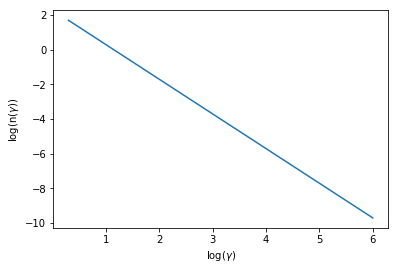

In [2]:
jet.electron_distribution.plot()

In [3]:
jet.add_EC_component("EC_BLR")
jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 L_Disk           | Disk                 | erg/s            | +1.000000e+45 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 R_BLR_in         | BLR                  | cm               | +1.000000e+18 | [+0.000000e+00,No           ] | False 
 R_BLR_out        | BLR                  | cm       

(1e-15, 1e-11)

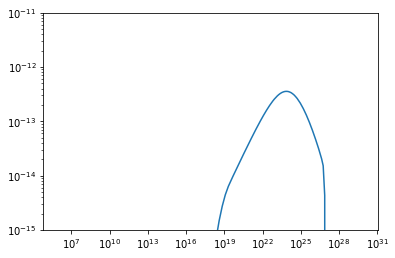

In [4]:
R_BLR_in = 1e17 
jet.set_par("R_H", 1e16) # within BLR
jet.set_par("R_BLR_in", R_BLR_in)
jet.eval()
ene, sed = jet.get_SED_points(name="EC_BLR")
plt.loglog(ene, sed)
plt.ylim([1e-15, 1e-11])

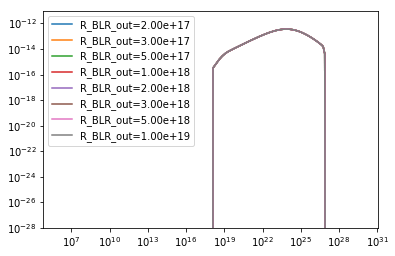

In [7]:
for R_BLR_out in R_BLR_in * np.asarray([2, 3, 5, 10, 20, 30, 50, 1e2]):
    jet.set_par("R_BLR_out", R_BLR_out)
    jet.eval()
    ene, sed = jet.get_SED_points(name="EC_BLR")
    plt.loglog(ene, sed, label=f"R_BLR_out={R_BLR_out:.2e}")

plt.legend()
plt.ylim([1e-28, 1e-11])
plt.show()

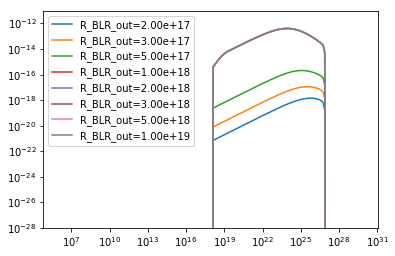

In [9]:
jet.set_par("R_H", 1e18) # outside BLR
for R_BLR_out in R_BLR_in * np.asarray([2, 3, 5, 10, 20, 30, 50, 1e2]):
    jet.set_par("R_BLR_out", R_BLR_out)
    jet.eval()
    ene, sed = jet.get_SED_points(name="EC_BLR")
    plt.loglog(ene, sed, label=f"R_BLR_out={R_BLR_out:.2e}")

plt.legend()
plt.ylim([1e-28, 1e-11])
plt.show()